## Importing libraries

In [64]:
import pandas as pd
import numpy as np

## Reading the dataset

In [65]:
shop = pd.read_csv('/content/shopping_trends_updated.csv')
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Extracting Necessary informations about the dataset provided

In [66]:
shop.shape

(3900, 18)

In [67]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [68]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [69]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


No null values are there in the given dataset.

In [70]:
shop_dup = shop[shop.duplicated()]
shop_dup

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


No duplicate values are there in the given dataset

In [71]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")

The unique values of the 'Gender' column are: ['Male' 'Female']
The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']
The unique values of the 'Subscription Status' column are: ['Yes' 'No']
The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
The unique values of the 'Discount Applied' column are: ['Yes' 'No']
The unique values of the 'Promo Code Used' column are: ['Yes' 'No']
The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


Two types of gender are present in the dataset:
1.   Male
2.   Female


In [72]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Description of the dataset and relationships between the columns:


1.   **Age:** The minimum age is 44 and maximum age is 70.
2.   **Purchase Amount**: The minimum purchase is 20 USD and maximum purchase is 100 USD.
3.   **Review Rating**: Some of the customers have given minimum rating of 2.5 on purchased objects and some of them have given maximum rating of 5.0 on the purchased objects

Therefore middle age people have purchased more.
People are purchasing our product but not actually satisfied with the product


In [73]:
shop.describe(include = 'object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


# 1. What is the overall distribution of customer ages in the dataset?

In [74]:
shop['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


## Descriptive Analysis

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

Making a column of Age_category divided into:  

1.   Child
2.   Teen
3.   Young Adults
4.   Middle-Aged-Adults
5.   Old

In [77]:
shop['Age'].mean()

44.06846153846154

In [78]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
shop['Age_category'] = pd.cut(shop['Age'],bins = [0,15,18,30,50,70],labels = ['child','teen','Young Adults','Middle-Aged-Adults','old'])
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,old
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adults
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-Aged-Adults
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adults
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-Aged-Adults


In [80]:
fig = px.histogram(shop, y = "Age", x = "Age_category")
fig.show()

# 2. How does the average purchase amount vary across different product categories?

In [96]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [97]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [102]:
shop.groupby('Category')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Category,
Accessories,74200
Clothing,104264
Footwear,36093
Outerwear,18524


In [98]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


# 3. Which gender has the highest number of purchases?

In [99]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

<Axes: xlabel='Gender'>

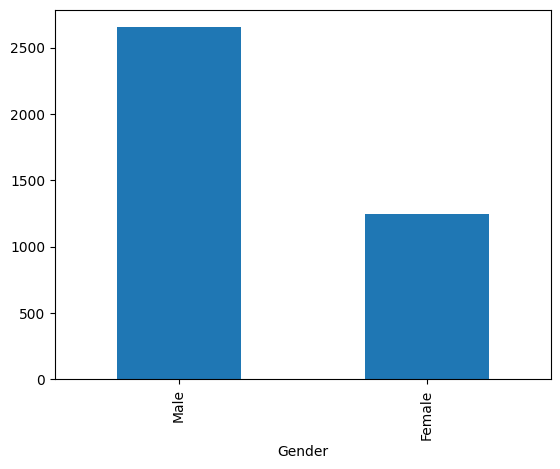

In [103]:
shop['Gender'].value_counts().plot(kind ='bar' )

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

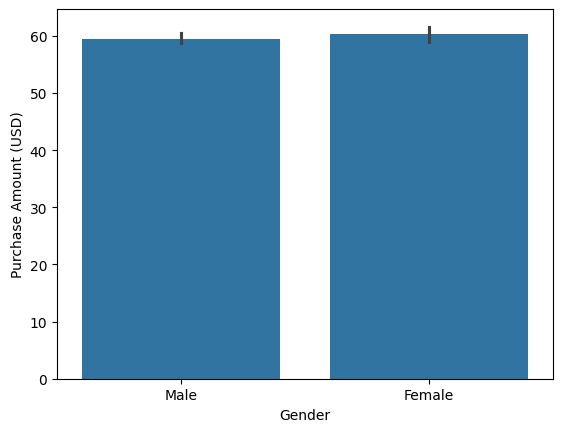

In [104]:
sns.barplot(shop, x = 'Gender',y = 'Purchase Amount (USD)')

Both Male and Female have the same amount of purchases

# 4. What are the most commonly purchased items in each category?

In [105]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [106]:
fig = px.histogram(shop, x = 'Item Purchased',color = 'Category')
fig.show()

# 5. Are there any specific seasons or months where customer spending is significantly higher?

In [109]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [107]:
data = shop['Season'].value_counts()
data

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


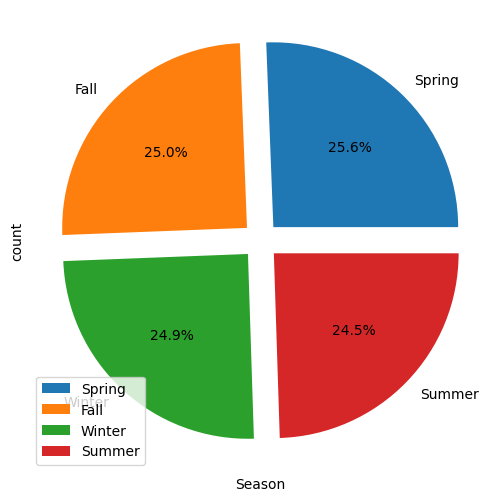

In [108]:
plt.figure(figsize=(20,6))
data = shop['Season'].value_counts()
explode =[0.1]*len(data)
data.plot(kind = 'pie', explode = explode, autopct = "%1.1f%%")
plt.xlabel('Season')
plt.legend()
plt.show()

All seasons are equally distributed in terms of sales

In [110]:
fig = px.histogram(shop, x = 'Season',range_y = [800,1200])
fig.show()

# 6. What is the average rating given by customers for each product category?

In [113]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


In [114]:
fig = px.bar(shop_groupby, x = 'Category', y = "Review Rating")
fig.show()

The ratings are more and less same for every category

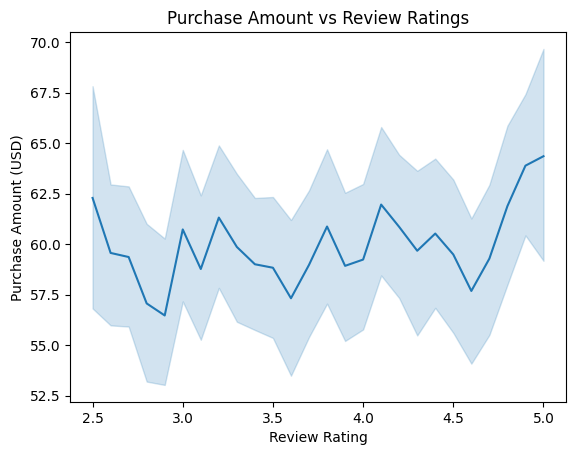

In [171]:
sns.lineplot(data = shop, x='Review Rating', y='Purchase Amount (USD)')
plt.title('Purchase Amount vs Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()


# 7. Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [115]:
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

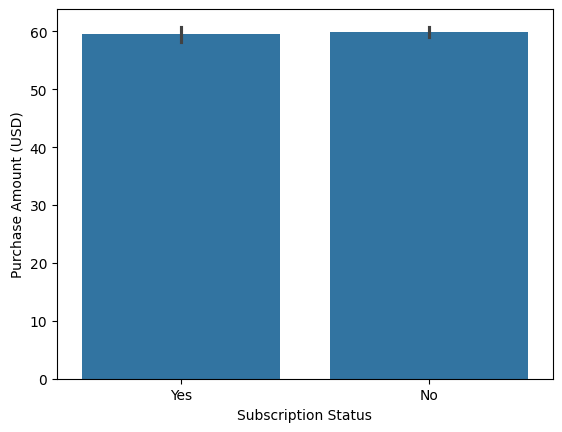

In [116]:
sns.barplot(shop, x = 'Subscription Status', y = "Purchase Amount (USD)")

The subscription is taken by half of the poeple and half of the people didn't take the subscription. So there is no benefit of the subscription since there is no benefit of the subscription.

In [117]:
shop['Purchase Amount (USD)'].sum()

233081

In [120]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


# 8. Which payment method is the most popular among customers?

In [121]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

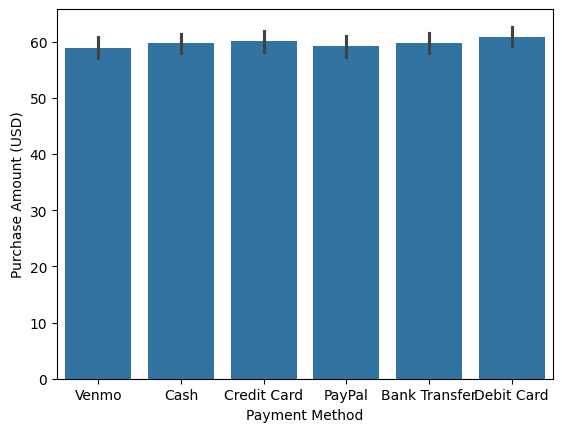

In [122]:
sns.barplot(x = 'Payment Method', y = 'Purchase Amount (USD)',data = shop)

Therefore all payment methods are more and less equal.

# 9. Do customers who use promo codes tend to spend more than those who don't?

In [124]:
shop_groupby = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [126]:
fig = px.sunburst(shop, path = ['Gender','Promo Code Used'],values = 'Purchase Amount (USD)')
fig.show()

In [128]:
fig = px.bar(shop_groupby, x = 'Promo Code Used', y = 'Purchase Amount (USD)')
fig.show()

# 10. How does the frequency of purchases vary across different age groups?

In [129]:
shop[['Age','Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged-Adults
3,21,Young Adults
4,45,Middle-Aged-Adults
...,...,...
3895,40,Middle-Aged-Adults
3896,52,old
3897,46,Middle-Aged-Adults
3898,44,Middle-Aged-Adults


In [130]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged-Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged-Adults' < 'old']

In [132]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [133]:
px.sunburst(shop,path = ['Frequency of Purchases','Age_category'],values = 'Age')

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# 11. Are there any correlations between the size of the product and the purchase amount?

In [134]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [137]:
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [140]:
fig = px.bar(shop_group, x = 'Size', y = 'Purchase Amount (USD)')
fig.show()

# 12. Which shipping type is preferred by customers for different product categories?

In [143]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending = True)

Category     Shipping Type 
Outerwear    Standard           49
             2-Day Shipping     50
             Next Day Air       51
             Store Pickup       53
             Express            57
             Free Shipping      64
Footwear     2-Day Shipping     90
             Next Day Air       93
             Express            96
             Store Pickup       98
             Standard          100
             Free Shipping     122
Accessories  Free Shipping     195
             Express           203
             2-Day Shipping    206
             Standard          208
             Next Day Air      211
             Store Pickup      217
Clothing     2-Day Shipping    281
             Store Pickup      282
             Express           290
             Next Day Air      293
             Free Shipping     294
             Standard          297
Name: count, dtype: int64

# 13. How does the presence of a discount affect the purchase decision of customers?

In [144]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [145]:
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [146]:
px.histogram(shop_group,x = 'Discount Applied',y = "Purchase Amount (USD)")

In [149]:
fig = px.sunburst(shop, path = ['Gender','Discount Applied'],values='Purchase Amount (USD)',color = 'Gender')
fig.show()

# 14. Are there any specific colors that are more popular among customers?

In [150]:
px.histogram(shop,x = 'Color')

In [157]:
shop['Color'].value_counts().nlargest(5)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


# 15. What is the average number of previous purchases made by customers?

In [154]:
shop['Previous Purchases'].mean()

25.35153846153846

# 16. How does the purchase amount differ based on the review ratings given by customers?

In [159]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310
Washington,63.328767
North Dakota,62.891566
Virginia,62.883117
Utah,62.577465


In [160]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [161]:
fig = px.bar(shop_group,x = 'Location', y = "Purchase Amount (USD)")
fig.show()

# 17. Are there any noticeable differences in purchase behavior between different locations?

In [162]:
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

In [163]:
fig = px.bar(shop_group, y = "Age", x = "Category")
fig.show()

# 18. Is there a relationship between customer age and the category of products they purchase?

In [166]:
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

In [167]:
fig = px.bar(shop_group, y = "Gender", x = "Purchase Amount (USD)")
fig.show()

In [169]:
px.sunburst(data_frame = shop, path = ['Gender','Age_category'],values = "Purchase Amount (USD)")

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Plotting the histogram of age

(array([212., 206., 153., 231., 147., 224., 214., 147., 226., 159., 199.,
        223., 155., 226., 147., 243., 213., 148., 197., 230.]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ,
        46.6, 49.2, 51.8, 54.4, 57. , 59.6, 62.2, 64.8, 67.4, 70. ]),
 <BarContainer object of 20 artists>)

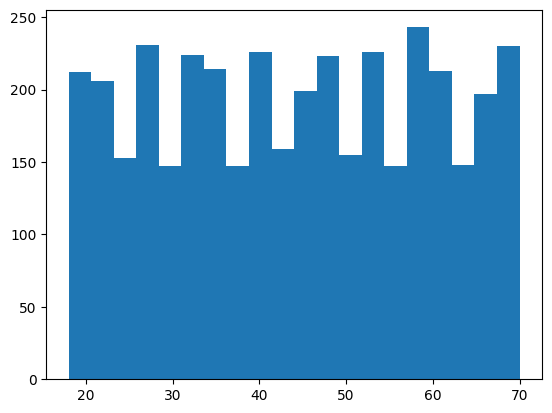

In [81]:
plt.hist(shop['Age'],bins = 20)

# 19. How does the average purchase amount differ between male and female customers?

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

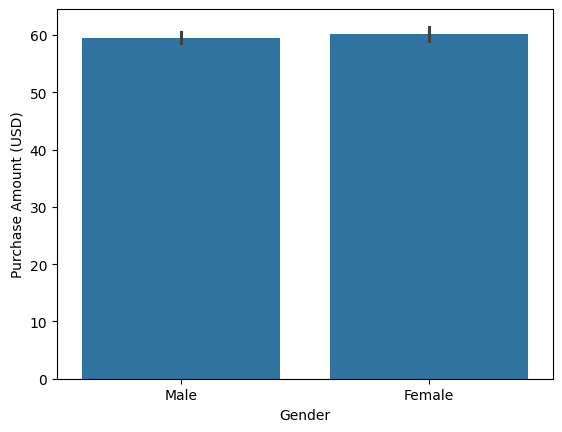

In [170]:
sns.barplot(shop, x = 'Gender',y = 'Purchase Amount (USD)')

# Other Analysis

Plotting the bar graph of gender column

<Axes: xlabel='Gender'>

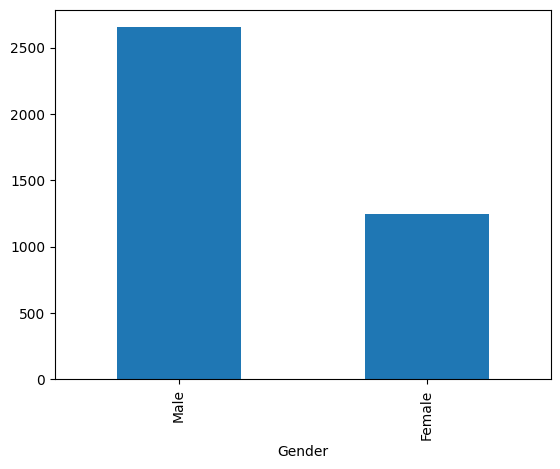

In [82]:
shop['Gender'].value_counts().plot(kind ='bar' )

Plotting the pie chart of Gender column

Text(0.5, 0, 'Gender')

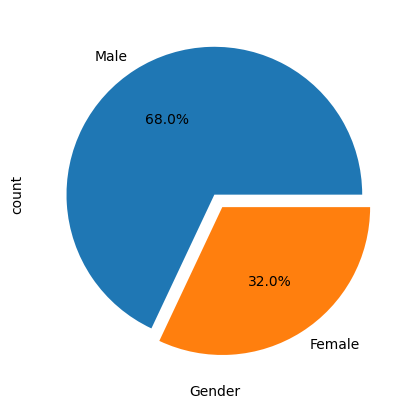

In [83]:
data = shop['Gender'].value_counts()
data.plot(kind = 'pie',explode = (0,0.1),autopct ="%1.1f%%" )
plt.xlabel('Gender')

68% are male buyers and 32% are female buyers

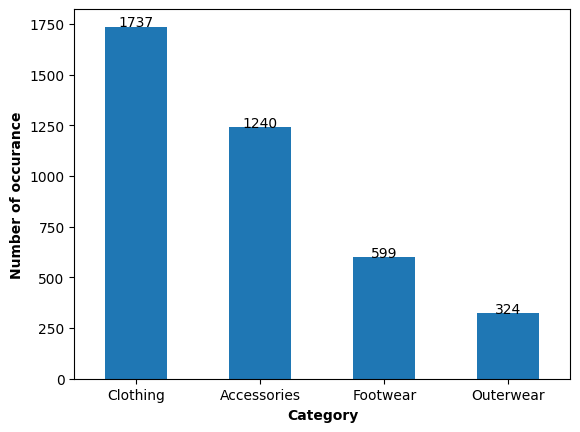

In [84]:
ax = shop['Category'].value_counts().plot(kind='bar', rot=0)
for p in ax.patches:
  ax.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1), ha='center')
plt.xlabel("Category", weight='bold')
plt.ylabel("Number of occurance", weight='bold')
plt.show()

1. 1737 occurances are from clothing
2. 1240 occurances are from accessories
3. 599 occurances are from footware
4. 324 occurances are from outerwear


This means clothing has the highest demand followed by others and these items should be more in stock.

Plotting a pie chart to measure the sales amount of different categories

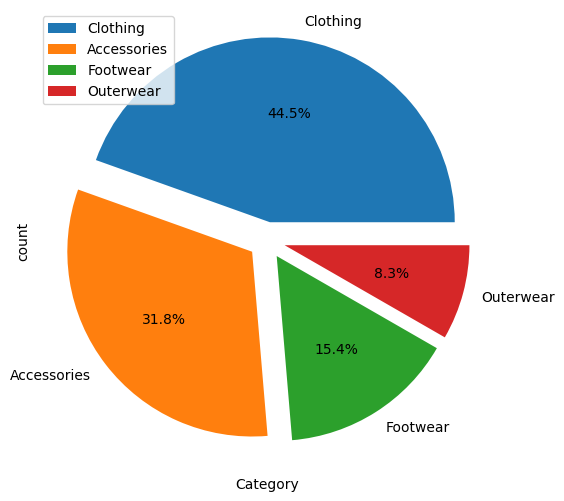

In [85]:
plt.figure(figsize=(20,6))
data = shop['Category'].value_counts()
explode =[0.1]*len(data)
data.plot(kind = 'pie', explode = explode, autopct = "%1.1f%%")
plt.xlabel('Category')
plt.legend()
plt.show()

1.   44.5% sales are from clothing
2.   31.5% sales are from accessories
3.   15.4% sales are from footwear
4.   8.3% sales are from outerwear


Therefore clothing has the maximum amount of sales followed by others.




<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

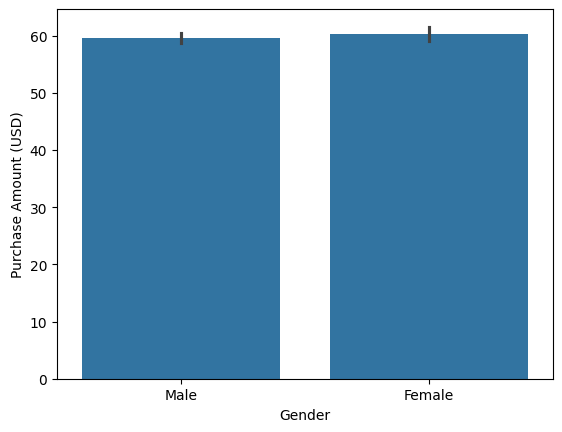

In [86]:
sns.barplot(shop, x = 'Gender',y = 'Purchase Amount (USD)')

In [87]:
data = shop['Season'].value_counts()
data

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


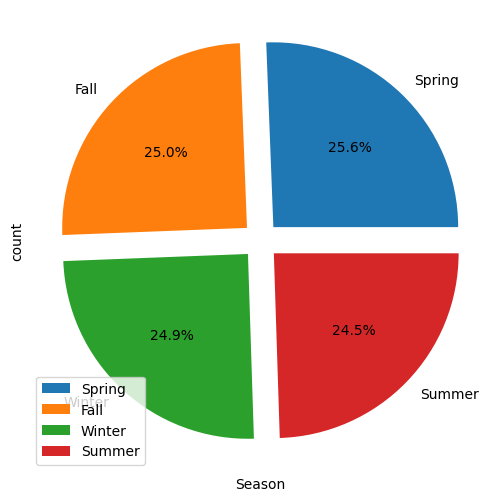

In [88]:
plt.figure(figsize=(20,6))
data = shop['Season'].value_counts()
explode =[0.1]*len(data)
data.plot(kind = 'pie', explode = explode, autopct = "%1.1f%%")
plt.xlabel('Season')
plt.legend()
plt.show()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

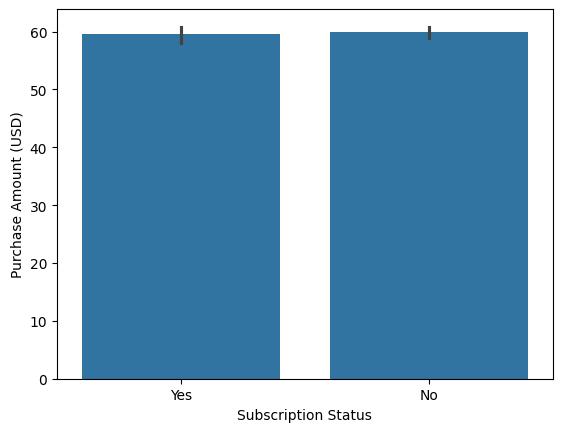

In [90]:
sns.barplot(shop, x = 'Subscription Status', y = "Purchase Amount (USD)")

In [91]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Payment Method,
Debit Card,60.915094
Credit Card,60.074516
Bank Transfer,59.712418
Cash,59.704478
PayPal,59.245199
Venmo,58.949527


Therefore all payment methods are equally popular.

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

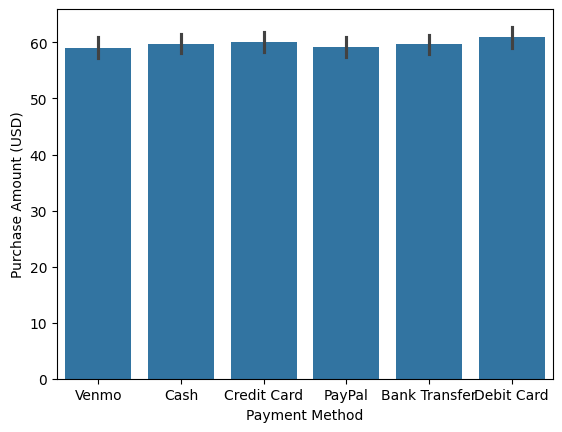

In [92]:
sns.barplot(x = 'Payment Method', y = 'Purchase Amount (USD)',data = shop)

Barplot is showing the usage of all available payment methods done by the customer.

In [93]:
num_fea = shop[['Age','Purchase Amount (USD)', 'Review Rating','Previous Purchases']]
num_fea.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


In [94]:
cor_mat = num_fea.corr()
cor_mat

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


Plotting the heatmap tp extract any underlying relationships among the columns

<Axes: >

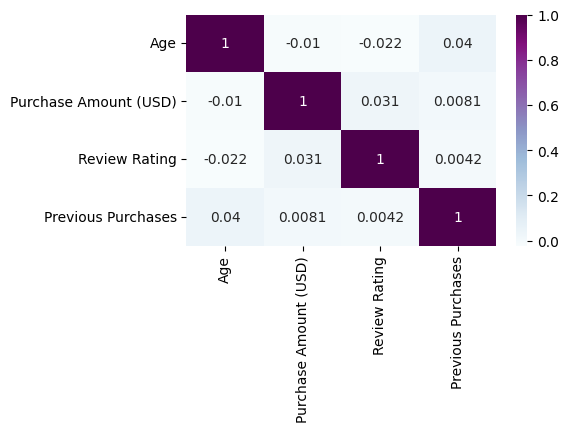

In [95]:
plt.figure(figsize = (5,3))
sns.heatmap(cor_mat,annot = True, cmap ='BuPu')

There is no such relationships between the columns